This notebook is comparing primary results from 1/4$^{\circ}$ simulations corresponding to two different strength of I-O freshwater flux component. The perturbation simulation (1.5 x I-O freshwater flux) was run from a restart file of the control run at 100 years and the simulations was continued until 150 years.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
from xgcm import Grid
import dask 
import dask.distributed
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Comparison of time series of mean energy, T and S.

In [2]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/"

ds_stat_con = xr.open_mfdataset(ppdir+"ocean.stats*.nc", concat_dim='Time', parallel=True)

ds_stat_per = xr.open_mfdataset(ppdir+"FW_IO_15/ocean.stats*.nc", concat_dim='Time', parallel=True)

In [9]:
dataset_ds = []

files = ["prog_n_10.nc","prog_n_50.nc","prog_n_60.nc","prog_n_80.nc","prog_n_100.nc", 
         "prog_n_125.nc", "prog_n_150.nc"]

for i in range(0, len(files)):
    d = xr.open_dataset(ppdir + files[i], chunks={"Time": 100})
    d1 = d.get(['thetaoga','soga','net_heat_surface','PRCmE'])
    #if(i>1):
    #    d = d.drop('heat_added')
    dataset_ds.append(d1)
        
ds_n = xr.concat(dataset_ds, dim='Time')
    
dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

ds_n_con = xr.merge([ds_n, dsgrid])

ds_n_per = xr.open_mfdataset(ppdir+"FW_IO_15/prog_n*.nc",concat_dim='Time', parallel=True, decode_times=False)
ds_n_per = xr.merge([ds_n_per, dsgrid])

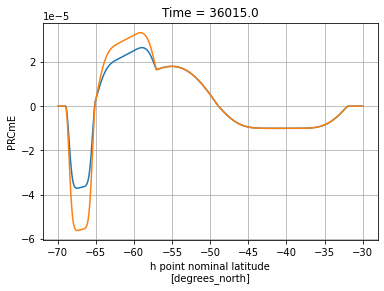

In [10]:
ds_n_con['PRCmE'].isel(Time=0).mean('xh').plot()
ds_n_per['PRCmE'].isel(Time=0).mean('xh').plot()
plt.grid()

Text(0, 0.5, 'Domain Mean Salinity (psu)')

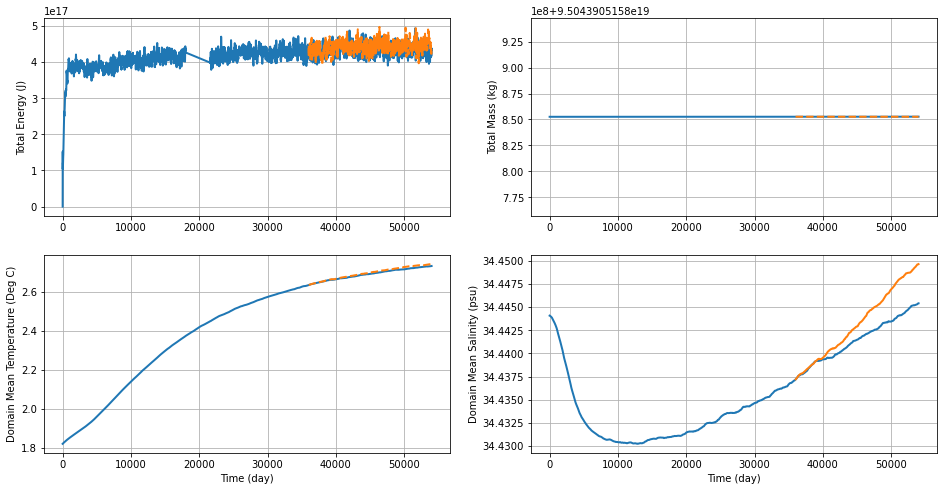

In [6]:
# create tiem array for time series
a = np.arange(15,17986,30)
b = np.arange(18000,36000,1)
c = np.arange(36015,54000,30)

tim = np.concatenate((a, b, c), axis=None)

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.plot(ds_stat_con['Time']/(24*3600*1e9), ds_stat_con['En'], lw=2, ls='-')
plt.plot(ds_stat_per['Time']/(24*3600*1e9), ds_stat_per['En'], lw=2, ls='--')
plt.grid()
#plt.xlabel('Time (day)')
plt.ylabel('Total Energy (J)')

plt.subplot(2,2,2)
plt.plot(ds_stat_con['Time']/(1e9*3600*24), ds_stat_con['Mass'], lw=2, ls='-')
plt.plot(ds_stat_per['Time']/(1e9*3600*24), ds_stat_per['Mass'], lw=2, ls='-')
plt.grid()
#plt.xlabel('Time (day)')
plt.ylabel('Total Mass (kg)')

plt.subplot(2,2,3)
plt.plot(tim, ds_n_con['thetaoga'], lw=2, ls='-')
plt.plot(c, ds_n_per['thetaoga'], lw=2, ls='--')
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Domain Mean Temperature (Deg C)')

plt.subplot(2,2,4)
plt.plot(tim, ds_n_con['soga'], lw=2, ls='-')
plt.plot(c, ds_n_per['soga'], lw=2, ls='-')
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Domain Mean Salinity (psu)')

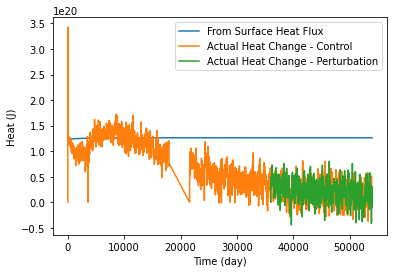

In [12]:
# Heat change

Heat_tot_con = (ds_n_con['net_heat_surface']* ds_n_con['area_t']).sum(['xh','yh'])

#Heat_tot_per = (ds_n_per['net_heat_surface']* ds_n_per['area_t']).sum(['xh','yh'])

plt.plot(tim, Heat_tot_con*10.*24.*3600.)
plt.plot(ds_stat_con['Time']/(1e9*3600*24),ds_stat_con['Heat_chg'])
plt.plot(ds_stat_per['Time']/(1e9*3600*24),ds_stat_per['Heat_chg'])
plt.xlabel('Time (day)')
plt.ylabel('Heat (J)')
plt.legend(['From Surface Heat Flux','Actual Heat Change - Control','Actual Heat Change - Perturbation'])

### Surface and Lat vs Depth Profiles

In [11]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/"

ds_z_con = xr.open_dataset(ppdir+"prog_z_150.nc")

ds_z_per = xr.open_dataset(ppdir+"FW_IO_15/prog_z_150.nc")

dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

ds_z_con = xr.merge([ds_z_con, dsgrid])
ds_z_per = xr.merge([ds_z_per, dsgrid])

In [5]:
print(ds_z_con)

<xarray.Dataset>
Dimensions:     (Time: 300, nv: 2, xh: 320, xq: 320, yh: 272, yq: 272, z_i: 36, z_l: 35)
Coordinates:
  * xh          (xh) float64 0.125 0.375 0.625 0.875 ... 79.12 79.38 79.62 79.88
  * yh          (yh) float64 -69.94 -69.85 -69.77 ... -30.46 -30.24 -30.02
  * z_l         (z_l) float64 0.5 3.019 9.006 ... 3.366e+03 3.613e+03 3.869e+03
  * z_i         (z_i) float64 0.0 1.0 5.038 12.97 ... 3.487e+03 3.738e+03 4e+03
  * Time        (Time) object 0126-01-16 00:00:00 ... 0150-12-16 00:00:00
  * nv          (nv) float64 1.0 2.0
  * xq          (xq) float64 0.25 0.5 0.75 1.0 1.25 ... 79.25 79.5 79.75 80.0
  * yq          (yq) float64 -69.89 -69.81 -69.72 ... -30.35 -30.13 -29.92
Data variables:
    temp        (Time, z_l, yh, xh) float32 ...
    salt        (Time, z_l, yh, xh) float32 ...
    rhopot0     (Time, z_l, yh, xh) float32 ...
    rhopot2     (Time, z_l, yh, xh) float32 ...
    u           (Time, z_l, yh, xq) float32 ...
    v           (Time, z_l, yq, xh) float32 .

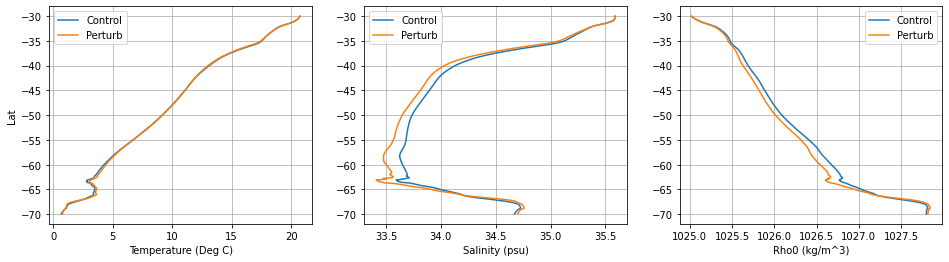

In [6]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
tmp1 = ds_z_con['temp'].isel(z_l=0).mean(['xh','Time'])
tmp2 = ds_z_per['temp'].isel(z_l=0).mean(['xh','Time'])
plt.plot(tmp1, ds_z_con['yh'], label = 'Control')
plt.plot(tmp2, ds_z_per['yh'], label = 'Perturb')
plt.grid()
plt.xlabel('Temperature (Deg C)')
plt.ylabel('Lat')
plt.legend()

plt.subplot(1,3,2)

tmp1 = ds_z_con['salt'].isel(z_l=0).mean(['xh','Time'])
tmp2 = ds_z_per['salt'].isel(z_l=0).mean(['xh','Time'])
plt.plot(tmp1, ds_z_con['yh'], label = 'Control')
plt.plot(tmp2, ds_z_per['yh'], label = 'Perturb')
plt.grid()
plt.xlabel('Salinity (psu)')
plt.legend()

plt.subplot(1,3,3)
tmp1 = ds_z_con['rhopot0'].isel(z_l=0).mean(['xh','Time'])
tmp2 = ds_z_per['rhopot0'].isel(z_l=0).mean(['xh','Time'])
plt.plot(tmp1, ds_z_con['yh'], label = 'Control')
plt.plot(tmp2, ds_z_per['yh'], label = 'Perturb')
plt.grid()
plt.xlabel('Rho0 (kg/m^3)')
plt.legend()

Text(0.5, 1.0, 'Difference')

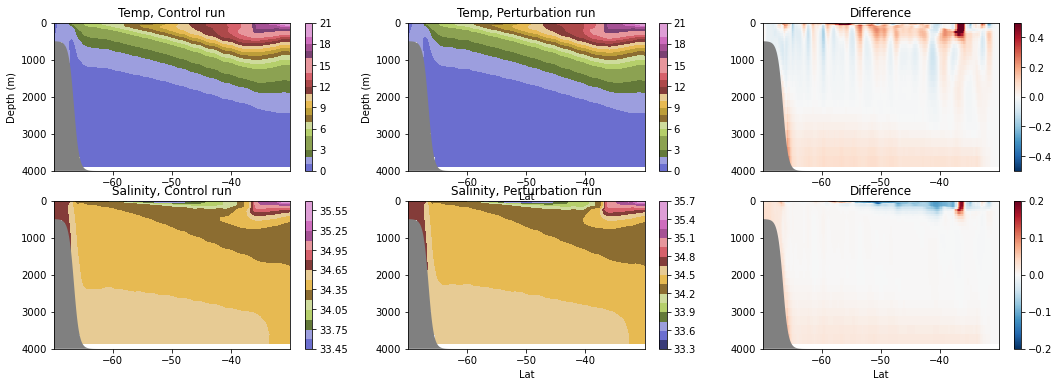

In [16]:
depth = ds_z_con['depth_ocean'].isel(xh=0)

plt.figure(figsize=(18,6))

ds2 = ds_z_con.isel(Time=299, xh=slice(0,100)).mean('xh')

plt.subplot(2,3,1)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['temp'], 20, vmin = -2, vmax = 20, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.title('Temp, Control run')

plt.subplot(2,3,4)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['salt'], 20, vmin = 33.3, vmax = 35.5, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.title('Salinity, Control run')

ds3 = (- ds_z_con.isel(Time=299, xh=slice(0,100)).mean('xh') + ds_z_per.isel(Time=299, xh=slice(0,100)).mean('xh'))
plt.subplot(2,3,3)
plt.pcolor(ds3['yh'], ds3['z_l'], ds3['temp'], vmin = -0.5, vmax = 0.5, cmap='RdBu_r')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.title('Difference')

ds2 = ds_z_per.isel(Time=299, xh=slice(0,100)).mean('xh')

plt.subplot(2,3,2)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['temp'], 20, vmin = -2, vmax = 20, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Lat')
plt.title('Temp, Perturbation run')

plt.subplot(2,3,5)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['salt'], 20, vmin = 33.3, vmax = 35.5, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.xlabel('Lat')
plt.title('Salinity, Perturbation run')

plt.subplot(2,3,6)
plt.pcolor(ds3['yh'], ds3['z_l'], ds3['salt'], vmin = -0.2, vmax = 0.2, cmap='RdBu_r')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,4000))
plt.gca().invert_yaxis()
plt.xlabel('Lat')
plt.title('Difference')

In [22]:
ds_z_con.close()
ds_z_per.close()

### Overturning Circulation

In [17]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/"

ds_rho_con = xr.open_dataset(ppdir+"prog_rho2_150.nc")

ds_rho_per = xr.open_dataset(ppdir+"FW_IO_15/prog_rho2_150.nc")

dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

ds_rho_con = xr.merge([ds_rho_con, dsgrid])
ds_rho_per = xr.merge([ds_rho_per, dsgrid])

In [18]:
grid_r = Grid(ds_rho_con, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Rho': {'center': 'rho2_l', 'outer': 'rho2_i'} }, periodic=['X']);

psi_r_con = grid_r.cumsum(ds_rho_con['vmo'].isel(Time=slice(180,300)).mean('Time'), 'Rho', boundary='fill')
psi_r_con = psi_r_con.sum('xh')

psi_r_con = psi_r_con / 1035.

grid_r = Grid(ds_rho_per, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Rho': {'center': 'rho2_l', 'outer': 'rho2_i'} }, periodic=['X']);

psi_r_per = grid_r.cumsum(ds_rho_per['vmo'].isel(Time=slice(180,300)).mean('Time'), 'Rho', boundary='fill')
psi_r_per = psi_r_per.sum('xh')

psi_r_per = psi_r_per / 1035.

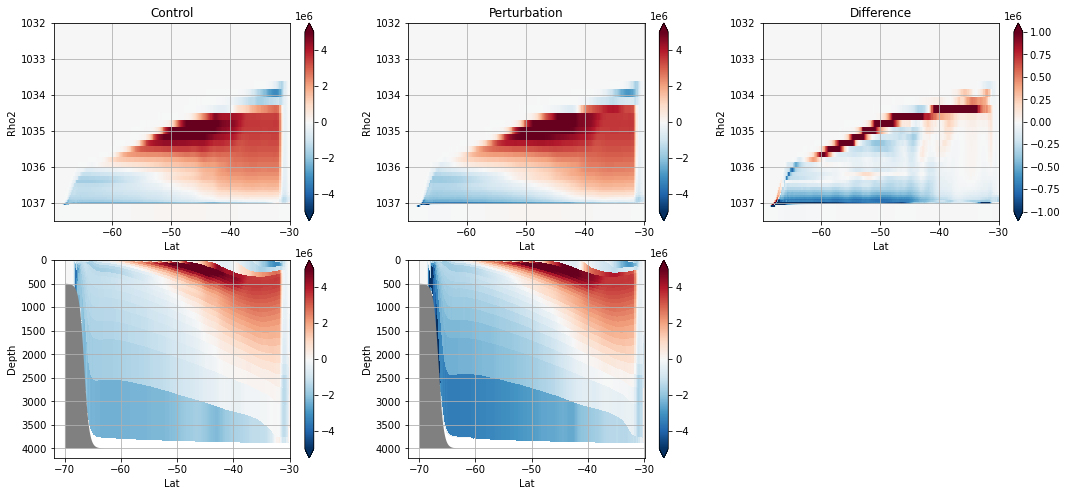

In [21]:
plt.figure(figsize=(18,8))

max_r = 0.5e7

plt.subplot(2,3,1)
plt.pcolor(ds_rho_con['yq'], ds_rho_con['rho2_i'], psi_r_con, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
plt.colorbar(extend='both')
plt.ylabel('Rho2')
plt.title('Control')
#if(ct == 2):
plt.xlabel('Lat')
plt.grid()
plt.gca().invert_yaxis()

plt.subplot(2,3,2)
plt.pcolor(ds_rho_per['yq'], ds_rho_per['rho2_i'], psi_r_per, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
plt.colorbar(extend='both')
plt.ylabel('Rho2')
#if(ct == 2):
plt.xlabel('Lat')
plt.title('Perturbation')
plt.grid()
plt.gca().invert_yaxis()

plt.subplot(2,3,3)
plt.pcolor(ds_rho_con['yq'], ds_rho_con['rho2_i'], psi_r_per - psi_r_con, vmin = -0.2*max_r, vmax = 0.2*max_r, cmap='RdBu_r')
plt.colorbar(extend='both')
plt.ylabel('Rho2')
plt.title('Difference')
#if(ct == 2):
plt.xlabel('Lat')
plt.grid()
plt.gca().invert_yaxis()

z_con = grid_r.cumsum(ds_rho_con['h'].isel(Time=slice(180,300)).mean('Time'), 'Rho', boundary='fill')
z_con = grid_r.interp(z_con, 'Y', boundary='fill').mean('xh')

z_per = grid_r.cumsum(ds_rho_per['h'].isel(Time=slice(180,300)).mean('Time'), 'Rho', boundary='fill')
z_per = grid_r.interp(z_per, 'Y', boundary='fill').mean('xh')

plt.subplot(2,3,4)
depth = ds_rho_con['depth_ocean'].isel(xh=0)
plt.pcolor(ds_rho_con['yq'], z_con, psi_r_con, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
plt.fill_between(ds_rho_con['yh'], depth, 4000., fc='grey')
plt.colorbar(extend='both')
plt.ylabel('Depth')
plt.xlabel('Lat')
plt.grid()
plt.gca().invert_yaxis()

plt.subplot(2,3,5)
depth = ds_rho_per['depth_ocean'].isel(xh=0)
plt.pcolor(ds_rho_per['yq'], z_per, psi_r_per, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
plt.fill_between(ds_rho_per['yh'], depth, 4000., fc='grey')
plt.colorbar(extend='both')
plt.ylabel('Depth')
plt.xlabel('Lat')
plt.grid()
plt.gca().invert_yaxis()

In [23]:
ds_rho_con.close()
ds_rho_per.close()

### Compare EP fluxes, overturning in z

This notebook is for computing mean meridional overturning circulation. For this, employ the following two methods,

#### Trasient Eluerian Mean (TEM) Framework 

In the TEM framework, we compute the overturning due the mean flow and eddies.

$$ \psi^* =  \overline{\psi} + \psi_e $$

$$ \overline{\psi}(y,z) = - \int_{-H}^{z}\overline{v}(y,z')dz' = - \int_{-H}^{0}\overline{v}(y,z')dz' + \int_{z}^{0}\overline{v}(y,z')dz' $$

$$ \psi_e = \dfrac{1}{N^2}\overline{v'b'} $$

Here, $b = -g\rho/\rho_o$ and $N^2 = \dfrac{\partial \overline{b}}{ \partial z}$. Primes are deviations from the zonal and time averaged quantities. 

#### Output in Rho2 coordinate

In this, we output `vh` field in Rho2 coordinate. We can integrate this diagnostic over `Rho2` to obtain full overturning in density coordinate. We then compute $\psi(y,z)$ from $\psi(y,\rho)$. Eddy component can then be computed as $\psi(y,z) - \overline{\psi}(y,z)$  

#### Eliassen-Palm Fluxes

We can also compute EP fluxes using velocity and buoyancy anomalies. The divergence of these fluxes inform us how eddies transfer momentum in space.

$$\mathcal{F} = -\overline{u'v'} \hat{ j}+ \dfrac{f}{N^2}\overline{v'b'} \hat{ k}$$

In [2]:
ds_z = []
ds_rho = []

# Read data for control run
path = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/"

d1 = xr.open_dataset(path + 'prog_z_150.nc')
d1 = d1.isel(Time=slice(180,300))

d2 = xr.open_dataset(path + 'prog_rho2_150.nc') # chunks={'yh':100, 'yq':100})
d2 = d2.isel(Time=slice(180,300))

dsgrid = xr.open_dataset(path + "grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

d1 = xr.merge([d1, dsgrid])
d2 = xr.merge([d2, dsgrid])

ds_z.append(d1)
ds_rho.append(d2)

# Read data for 1.5 x I-O freshwater flux forcing
path = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/FW_IO_15/"

d1 = xr.open_dataset(path + 'prog_z_150.nc')
d1 = d1.isel(Time=slice(180,300))

d2 = xr.open_dataset(path + 'prog_rho2_150.nc') # chunks={'yh':100, 'yq':100})
d2 = d2.isel(Time=slice(180,300))

d1 = xr.merge([d1, dsgrid])
d2 = xr.merge([d2, dsgrid])

ds_z.append(d1)
ds_rho.append(d2)

In [3]:
g, rho_0 = (9.8, 1035.)

psim_z = []
um_z = []

for i in range(0,2):
    
    grid_z = Grid(ds_z[i], coords={'X': {'center': 'xh', 'right': 'xq'},
                                'Y': {'center': 'yh', 'right': 'yq'},
                                'Z': {'center': 'z_l', 'outer': 'z_i'} }, periodic=['X']);

    %time psi_m = (grid_z.cumsum(ds_z[i]['vmo'].mean('Time'), 'Z', boundary='fill'))

    psi_m = psi_m.sum('xh')

    psi_m = psi_m - psi_m.isel(z_i=35)

    %time psi_m = psi_m.load() / rho_0
    
    psim_z.append(psi_m)
    
    %time u_m = ds_z[i]['u'].mean(['Time','xq'])
    
    um_z.append(u_m)

CPU times: user 2.7 s, sys: 3.96 s, total: 6.66 s
Wall time: 21.2 s
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 198 µs
CPU times: user 2.54 s, sys: 3.99 s, total: 6.53 s
Wall time: 17.3 s
CPU times: user 2.78 s, sys: 3.86 s, total: 6.64 s
Wall time: 28.2 s
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 183 µs
CPU times: user 2.45 s, sys: 3.8 s, total: 6.25 s
Wall time: 25.4 s


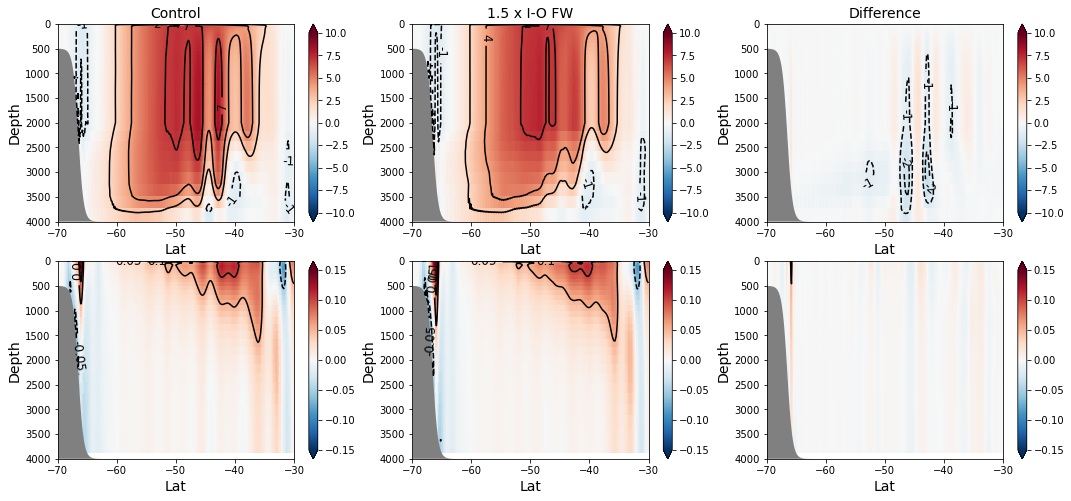

In [4]:
depth = ds_z[0]['depth_ocean'].isel(xh=0)
psi_lev = [-3, -2, -1, 2, 4, 7]
u_lev = [-0.1, -0.05, 0.05, 0.1]
titl = ['Control', '1.5 x I-O FW', 'Difference']

grid1 = plt.GridSpec(2, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,8])

for i in range(0,3):
    
    if(i<2):
        psi = psim_z[i] / 1.e6
        u = um_z[i]
    else:
        psi = (psim_z[1] - psim_z[0])/ 1.e6
        u = um_z[1] - um_z[0]
        
    ax = fig.add_subplot(grid1[0, i])
    plt.pcolor(ds_z[0]['yq'], ds_z[0]['z_i'], psi, vmin = -10., vmax = 10., cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds_z[0]['yq'], ds_z[0]['z_i'], psi, psi_lev, colors='black', linewidths=1.5)
    #plt.clabel(CS, inline=True, fontsize=12)
    fmt = {}
    strs = ['-3', '-2', '-1', '2', '4', '7']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    plt.clabel(CS, CS.levels, fmt=fmt, inline=True, fontsize=12)
    plt.fill_between(ds_z[0]['yh'], depth, 4000., fc='grey')
    plt.ylabel('Depth', fontsize=14)
    plt.xlabel('Lat', fontsize=14)
    plt.xlim((-70.,-30.))
    plt.title(titl[i], fontsize=14)
    plt.gca().invert_yaxis()
    
    
    ax = fig.add_subplot(grid1[1, i])
    plt.pcolor(ds_z[0]['yh'], ds_z[0]['z_l'], u, vmin = -0.15, vmax = 0.15, cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds_z[0]['yh'], ds_z[0]['z_l'], u, u_lev, colors='black', linewidths=1.5)
    #plt.clabel(CS, inline=True, fontsize=12)
    fmt = {}
    strs = ['-0.1', '-0.05', '0.05', '0.1']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    plt.clabel(CS, CS.levels, fmt=fmt, inline=True, fontsize=12)
    plt.fill_between(ds_z[0]['yh'], depth, 4000., fc='grey')
    plt.ylabel('Depth', fontsize=14)
    plt.xlabel('Lat', fontsize=14)
    plt.xlim((-70.,-30.))
    plt.ylim((0.,4000.))
    #plt.title(titl[i], fontsize=14)
    plt.gca().invert_yaxis()

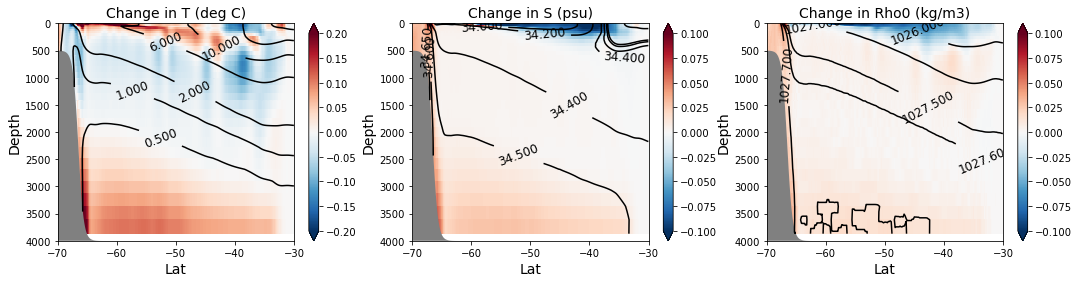

In [13]:
# Change in salinity, temperature, rho0.

depth = ds_z[0]['depth_ocean'].isel(xh=0)
T_lev = [0.5, 1., 2., 6., 10., 14., 18.]
S_lev = [33.5, 34., 34.2, 34.4, 34.5, 34.6, 34.65, 35.2]
Rho_lev = [1024., 1025., 1026., 1027., 1027.5, 1027.6, 1027.7]


grid1 = plt.GridSpec(1, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,4])

ax = fig.add_subplot(grid1[0, 0])
tmp = ds_z[1]['temp'].mean(['Time','xh']) - ds_z[0]['temp'].mean(['Time','xh'])
plt.pcolor(ds_z[0]['yh'], ds_z[0]['z_l'], tmp, vmin = -0.2, vmax = 0.2, cmap='RdBu_r')
plt.colorbar(extend='both')
CS = plt.contour(ds_z[0]['yh'], ds_z[0]['z_l'], ds_z[0]['temp'].mean(['Time','xh']), T_lev, colors='black', linewidths=1.5)
plt.clabel(CS, inline=True, fontsize=12)
plt.fill_between(ds_z[0]['yh'], depth, 4000., fc='grey')
plt.ylabel('Depth', fontsize=14)
plt.xlabel('Lat', fontsize=14)
plt.xlim((-70.,-30.))
plt.ylim((0.,4000.))
plt.title('Change in T (deg C)', fontsize=14)
plt.gca().invert_yaxis()

ax = fig.add_subplot(grid1[0, 1])
tmp = ds_z[1]['salt'].mean(['Time','xh']) - ds_z[0]['salt'].mean(['Time','xh'])
plt.pcolor(ds_z[0]['yh'], ds_z[0]['z_l'], tmp, vmin = -0.1, vmax = 0.1, cmap='RdBu_r')
plt.colorbar(extend='both')
CS = plt.contour(ds_z[0]['yh'], ds_z[0]['z_l'], ds_z[0]['salt'].mean(['Time','xh']), S_lev, colors='black', linewidths=1.5)
plt.clabel(CS, inline=True, fontsize=12)
plt.fill_between(ds_z[0]['yh'], depth, 4000., fc='grey')
plt.ylabel('Depth', fontsize=14)
plt.xlabel('Lat', fontsize=14)
plt.xlim((-70.,-30.))
plt.ylim((0.,4000.))
plt.title('Change in S (psu)', fontsize=14)
plt.gca().invert_yaxis()

ax = fig.add_subplot(grid1[0, 2])
tmp = ds_z[1]['rhopot0'].mean(['Time','xh']) - ds_z[0]['rhopot0'].mean(['Time','xh'])
plt.pcolor(ds_z[0]['yh'], ds_z[0]['z_l'], tmp, vmin = -0.1, vmax = 0.1, cmap='RdBu_r')
plt.colorbar(extend='both')
CS = plt.contour(ds_z[0]['yh'], ds_z[0]['z_l'], ds_z[0]['rhopot0'].mean(['Time','xh']), Rho_lev, colors='black', linewidths=1.5)
plt.clabel(CS, inline=True, fontsize=12)
plt.fill_between(ds_z[0]['yh'], depth, 4000., fc='grey')
plt.ylabel('Depth', fontsize=14)
plt.xlabel('Lat', fontsize=14)
plt.xlim((-70.,-30.))
plt.ylim((0.,4000.))
plt.title('Change in Rho0 (kg/m3)', fontsize=14)
plt.gca().invert_yaxis()

In [5]:
# Interpolate psi from rho to z coordinate (scipy to interpolate data on irregular grid to regular grid)

from scipy.interpolate import griddata
g, rho_0 = (9.8, 1035.)

psit_rho = []
psit_z = []

for i in range(0,2):
    
    grid_r = Grid(ds_rho[i], coords={'X': {'center': 'xh', 'right': 'xq'},
                                     'Y': {'center': 'yh', 'right': 'yq'},
                                     'Rho': {'center': 'rho2_l', 'outer': 'rho2_i'} }, periodic=['X']);

    h = grid_r.cumsum(ds_rho[i]['h'].mean('Time'), 'Rho', boundary='fill')
    h = grid_r.interp(h, 'Y', boundary='extend')
    
    psi_r = (grid_r.cumsum(ds_rho[i]['vmo'].mean('Time'), 'Rho', boundary='fill'))
    psi_r = psi_r.sum('xh')
    psi_r = psi_r - psi_r.isel(rho2_i=35)
    %time psi_r = psi_r.load() / rho_0
    psit_rho.append(psi_r)

    psi_int = psi_r.values * 0.
    
    z = ds_z[i]['z_i'].values
    y = ds_z[i]['yq'].values
    Y, Z = np.meshgrid(y, z)

    T = np.reshape(psi_r.values, (ds_z[i]['yq'].shape[0] * ds_z[i]['z_i'].shape[0]))
    py = np.reshape(Y, (ds_z[i]['yq'].shape[0] * ds_z[i]['z_i'].shape[0]))
    pz = np.reshape(h.isel(xh=0).values, (ds_z[i]['yq'].shape[0] * ds_z[i]['z_i'].shape[0]))
    psi_int = griddata((py, pz), T, (Y, Z), method='linear')
    
    psi_z = xr.DataArray(psi_int, coords=[("z_i",ds_z[i]['z_i']), ("yq",ds_z[i]['yq'])])
    psit_z.append(psi_z)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 199 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 182 µs


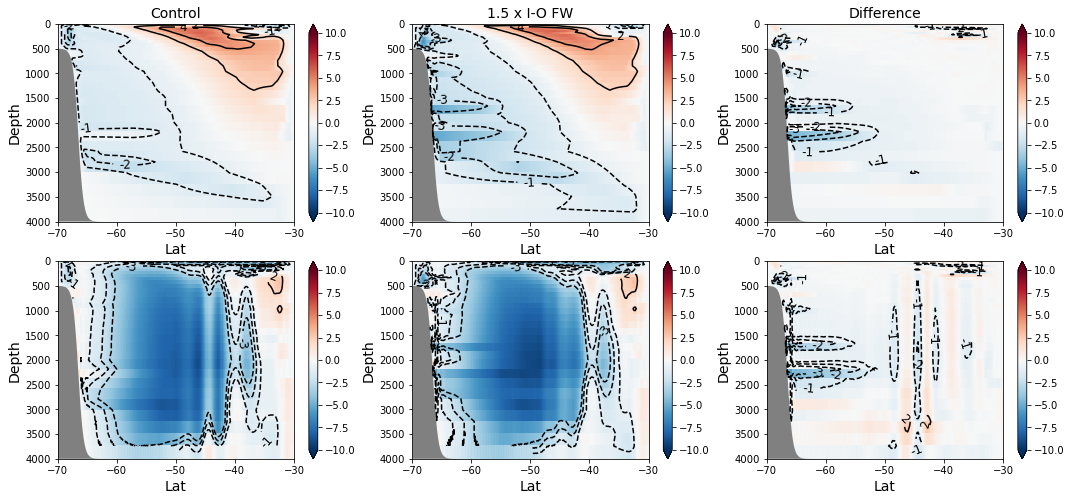

In [39]:
# Plot eddy psi 

depth = ds_z[0]['depth_ocean'].isel(xh=0)
psi_lev = [-3, -2, -1, 2, 4, 7]
u_lev = [-0.1, -0.05, 0.05, 0.1]
titl = ['Control', '1.5 x I-O FW', 'Difference']

grid1 = plt.GridSpec(2, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,8])

for i in range(0,3):
    
    if(i<2):
        psi = psit_z[i] / 1.e6
        psi_e = (psit_z[i] - psim_z[i]) / 1.e6
    else:
        psi = (psit_z[1] - psit_z[0])/ 1.e6
        psi_e = (psit_z[1] - psim_z[1] - (psit_z[0] - psim_z[0])) / 1.e6
        
    ax = fig.add_subplot(grid1[0, i])
    plt.pcolor(ds_z[0]['yq'], ds_z[0]['z_i'], psi, vmin = -10., vmax = 10., cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds_z[0]['yq'], ds_z[0]['z_i'], psi, psi_lev, colors='black', linewidths=1.5)
    #plt.clabel(CS, inline=True, fontsize=12)
    fmt = {}
    strs = ['-3', '-2', '-1', '2', '4', '7']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    plt.clabel(CS, CS.levels, fmt=fmt, inline=True, fontsize=12)
    plt.fill_between(ds_z[0]['yh'], depth, 4000., fc='grey')
    plt.ylabel('Depth', fontsize=14)
    plt.xlabel('Lat', fontsize=14)
    plt.xlim((-70.,-30.))
    plt.title(titl[i], fontsize=14)
    plt.gca().invert_yaxis()
    
    ax = fig.add_subplot(grid1[1, i])
    plt.pcolor(ds_z[0]['yq'], ds_z[0]['z_i'], psi_e, vmin = -10., vmax = 10., cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds_z[0]['yq'], ds_z[0]['z_i'], psi_e, psi_lev, colors='black', linewidths=1.5)
    #plt.clabel(CS, inline=True, fontsize=12)
    fmt = {}
    strs = ['-3', '-2', '-1', '2', '4', '7']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    plt.clabel(CS, CS.levels, fmt=fmt, inline=True, fontsize=12)
    plt.fill_between(ds_z[0]['yh'], depth, 4000., fc='grey')
    plt.ylabel('Depth', fontsize=14)
    plt.xlabel('Lat', fontsize=14)
    plt.xlim((-70.,-30.))
    plt.gca().invert_yaxis()

In [21]:
# Compute PV fluxes 

N2_z = []
EP_b = []
EP_u = []
psie_EP = []

for i in range(0,2):
    
    grid_z = Grid(ds_z[i], coords={'X': {'center': 'xh', 'right': 'xq'},
                                'Y': {'center': 'yh', 'right': 'yq'},
                                'Z': {'center': 'z_l', 'outer': 'z_i'} }, periodic=['X']);
    
    b = - g * ds_z[i]['rhopot0'] / rho_0

    b_m = b.mean(['xh','Time']).load()
    b_e = b - b_m

    v_m = ds_z[i]['v'].mean(['xh','Time']).load()
    v_e = ds_z[i]['v'] - v_m 

    u_m = ds_z[i]['u'].mean(['xq','Time']).load()
    u_e = ds_z[i]['u'] - u_m
    
    dz = grid_z.diff(ds_z[i]['z_i'], axis='Z', boundary='extend')
    N2 = - grid_z.diff(b_m, 'Z', boundary='extend') / grid_z.interp(dz, 'Z', boundary = 'extend')
    %time N2 = N2.load()
    
    N2_z.append(N2)
    
    psi_e = ((v_e * grid_z.interp(b_e, 'Y', boundary='fill')).mean('Time') 
                   / grid_z.interp(grid_z.interp(N2, 'Y', boundary='extend'),'Z', boundary='extend'))
    %time psi_e = ((psi_e * ds_z[i]['dyCv']).sum('xh')).load()
    psie_EP.append(psi_e)
    
    Fy = (- (grid_z.interp(u_e, axis='X', boundary='fill') * 
             grid_z.interp(v_e, axis='Y', boundary='fill')).mean(['xh','Time']))
    %time Fy = Fy.load()
    EP_u.append(Fy)

    Fz = ((grid_z.interp(v_e, axis='Y', boundary='fill') * b_e 
           / grid_z.interp(N2, 'Z', boundary='extend')).mean(['xh','Time']) * 
          grid_z.interp(ds_z[i]['Coriolis'].isel(xq=0), axis='Y', boundary='fill')) 
    %time Fz = Fz.load()
    
    EP_b.append(Fz)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 88.7 µs
CPU times: user 17 ms, sys: 9 ms, total: 26 ms
Wall time: 25.9 ms
CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 131 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 90.8 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 89.4 µs
CPU times: user 20 ms, sys: 14 ms, total: 34 ms
Wall time: 33.9 ms
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 118 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 89.2 µs


In [50]:
print(psi_e)

<xarray.DataArray (z_l: 35, yq: 272)>
array([[       -inf,        -inf,        -inf, ..., -0.08382457,
        -0.02591481,  0.        ],
       [ 0.02791451,        -inf,  0.06685169, ..., -0.03078488,
        -0.00742855,  0.        ],
       [ 0.02768039,  0.0297328 ,  0.02958614, ..., -0.02133481,
        -0.00479659,  0.        ],
       ...,
       [        nan,         nan,         nan, ..., -0.01957489,
         0.00066633,  0.        ],
       [        nan,         nan,         nan, ..., -0.03853338,
        -0.02443497,  0.        ],
       [        nan,         nan,         nan, ..., -0.06211936,
         0.00174387,  0.        ]])
Coordinates:
  * z_l      (z_l) float64 0.5 3.019 9.006 ... 3.366e+03 3.613e+03 3.869e+03
  * yq       (yq) float64 -69.89 -69.81 -69.72 -69.64 ... -30.35 -30.13 -29.92


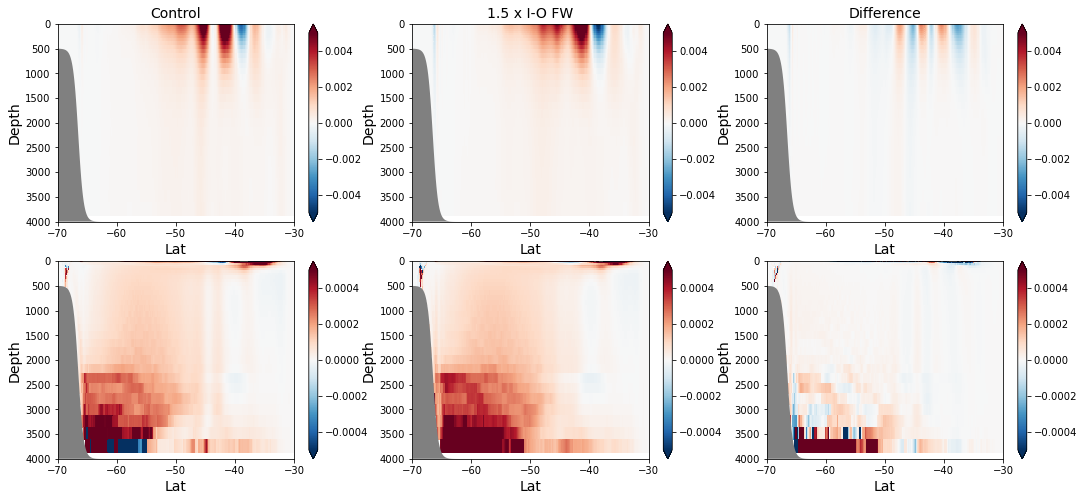

In [60]:
titl = ['Control', '1.5 x I-O FW', 'Difference']

grid1 = plt.GridSpec(2, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,8])

for i in range(0,3):
    
    if(i<2):
        EPu = EP_u[i]
        EPb = EP_b[i]
    else:
        EPu = EP_u[1] - EP_u[0]
        EPb = EP_b[1] - EP_b[0]
        
    ax = fig.add_subplot(grid1[0, i])
    plt.pcolor(ds_z[0]['yh'], ds_z[0]['z_l'], EPu, vmin = -5.e-3, vmax = 5.e-3, cmap='RdBu_r')
    plt.colorbar(extend='both')
    plt.fill_between(ds_z[0]['yh'], depth, 4000., fc='grey')
    plt.ylabel('Depth', fontsize=14)
    plt.xlabel('Lat', fontsize=14)
    plt.xlim((-70.,-30.))
    plt.title(titl[i], fontsize=14)
    plt.ylim((0.,4000.))
    plt.gca().invert_yaxis()
    
    ax = fig.add_subplot(grid1[1, i])
    plt.pcolor(ds_z[0]['yh'], ds_z[0]['z_l'], EPb, vmin = -0.5e-3, vmax = 0.5e-3, cmap='RdBu_r')
    plt.colorbar(extend='both')
    plt.fill_between(ds_z[0]['yh'], depth, 4000., fc='grey')
    plt.ylabel('Depth', fontsize=14)
    plt.xlabel('Lat', fontsize=14)
    plt.xlim((-70.,-30.))
    plt.ylim((0.,4000.))
    plt.gca().invert_yaxis()

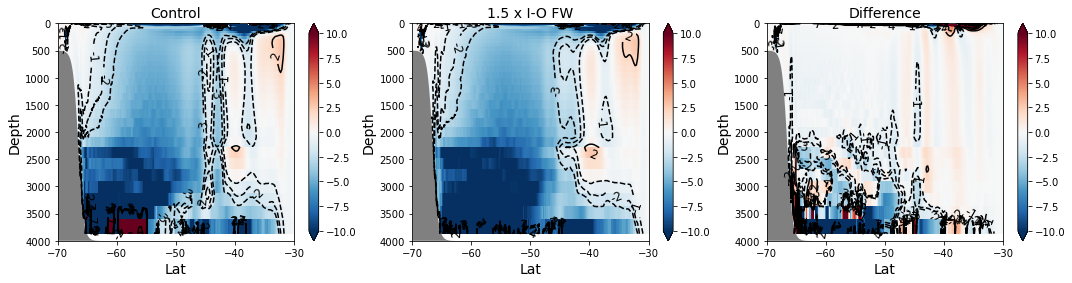

In [22]:
depth = ds_z[0]['depth_ocean'].isel(xh=0)
psi_lev = [-5, -3, -2, -1, 2, 4, 7]
titl = ['Control', '1.5 x I-O FW', 'Difference']

grid1 = plt.GridSpec(1, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,4])

for i in range(0,3):
    
    if(i<2):
        psi = psie_EP[i] / 1.e6
    else:
        psi = (psie_EP[1] - psie_EP[0])/ 1.e6
        
    ax = fig.add_subplot(grid1[0, i])
    plt.pcolor(ds_z[0]['yq'], ds_z[0]['z_l'], psi, vmin = -10., vmax = 10., cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds_z[0]['yq'], ds_z[0]['z_l'], psi, psi_lev, colors='black', linewidths=1.5)
    #plt.clabel(CS, inline=True, fontsize=12)
    fmt = {}
    strs = ['-3', '-2', '-1', '2', '4', '7']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    plt.clabel(CS, CS.levels, fmt=fmt, inline=True, fontsize=12)
    plt.fill_between(ds_z[0]['yh'], depth, 4000., fc='grey')
    plt.ylabel('Depth', fontsize=14)
    plt.xlabel('Lat', fontsize=14)
    plt.xlim((-70.,-30.))
    plt.ylim((0.,4000.))
    plt.title(titl[i], fontsize=14)
    plt.gca().invert_yaxis()

In [25]:
ds_z[0].close()
ds_rho[0].close()
ds_z[1].close()
ds_rho[1].close()